<a href="https://colab.research.google.com/github/AditiBhattacharya11/PlayStore-Review-Analysis-EDA/blob/main/Play_Store_App_Review_Analysis_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# IMPORTING REQUIRED LIBRARIES

In [27]:

#importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# allow matplotlib to plot inline



Importing all the necessary libraries to process and work on the databases.



# DATA

The datasets consist of two CSV files which are play store data.csv and user reviews.csv.

The play store data.csv has 10,841 observations and 13 variables about details of the applications on Google Play.

The user reviews.csv has 64,295 observations and 5 variables about the most relevant 100 reviews for each app and sentiment informations for each review.

The variables of each dataset are as below:

[Google Play Store App Datasets]

**Play store data.csv**

*   App: Application name

*   Rating: Overall user rating of the app


*   Reviews: Number of user reviews for the app

*   Size: Size of the app

*   Price: Price of the app
*   Installs: Number of user downloads/installs for the app
*   Type: Paid or Free

*  Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
*   Genres: An app can belong to multiple genres (apart from its main category)


**User reviews.csv**


*  Genres: An app can belong to multiple genres (apart from its main category)

*  App: Name of app


*  Translated_Review: User review (Preprocessed and translated to English)


*  Sentiment: Positive/Negative/Neutral (Preprocessed)




* Sentiment_Polarity: Sentiment polarity score (>0 - positive, <0 - nagative)
* Sentiment_Subjectivity: Sentiment subjectivity score (>0.5 - public opinion, <0.5 - factual information.)

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
dfpath='/content/drive/MyDrive/Almabetter/Copy of Play Store Data.csv'
reviewpath='/content/drive/MyDrive/Almabetter/Copy of User Reviews.csv'

In [30]:
playstoredf=pd.read_csv(dfpath)

In [31]:
reviewdf=pd.read_csv(reviewpath)

* Read the googleplaystore.csv data file of play store dataframe and saved the dataset into a data frame called playstoredf.

* Checked the important information of the dataset using .describe() function.

* Checked the information of the dataset using .info() function.

* Checked the contents of the dataset using .head() function.

---



In [32]:
playstoredf.describe(include="all")


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
playstoredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [34]:
playstoredf.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


* Read the userreview.csv data file of play store dataframe and saved the dataset into a data frame called reviewdf.

* Checked the important information of the dataset using .describe() function.

* Checked the information of the dataset using .info() function.

* Checked the contents of the dataset using .head() function.

In [35]:
reviewdf.describe(include="all")

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [36]:
reviewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [37]:
reviewdf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


* Merge the playstoredf and userreviewdf datasets using merge() function with the App variable as a relational key and stored the result in mergeddf data frame.

* Check the count information of app_detail using count() function

In [38]:
dfs=[playstoredf,reviewdf]
mergeddf=pd.concat(dfs,axis=1,join='inner')
mergeddf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,10 Best Foods for You,NaN,NaN,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,BEYBLADE BURST app,I love scan qr code change special attack valt...,Positive,0.531429,0.604286
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,BEYBLADE BURST app,NaN,NaN,NaN,NaN
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,BEYBLADE BURST app,It amazing game I loved I updated stared telli...,Positive,0.100000,0.520000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,BEYBLADE BURST app,You able control beyblades movement like joyst...,Positive,0.050000,0.512500


In [39]:
mergeddf.count()

App                       10841
Category                  10841
Rating                     9367
Reviews                   10841
Size                      10841
Installs                  10841
Type                      10840
Price                     10841
Content Rating            10840
Genres                    10841
Last Updated              10841
Current Ver               10833
Android Ver               10838
App                       10841
Translated_Review          6960
Sentiment                  6961
Sentiment_Polarity         6961
Sentiment_Subjectivity     6961
dtype: int64

In [40]:
mergeddf.isna().sum()

App                          0
Category                     0
Rating                    1474
Reviews                      0
Size                         0
Installs                     0
Type                         1
Price                        0
Content Rating               1
Genres                       0
Last Updated                 0
Current Ver                  8
Android Ver                  3
App                          0
Translated_Review         3881
Sentiment                 3880
Sentiment_Polarity        3880
Sentiment_Subjectivity    3880
dtype: int64

# Analyzing Sentiment Subjectivity: 
The Sentiment_Subjectivity variable has a score value between 0 and 1 which indicates the review is subjective or not as if the score is greater or equal to 0.5 then the review is a public opinion otherwise it is a factual information.

In [ ]:
mergeddf['Sentiment']='Public Opinion' 
mergeddf.loc[mergeddf['Sentiment_Subjectivity']>=0.5, 'Sentiment'] = 'Factual Information'
mergeddf['Sentiment']

0        Factual Information
1             Public Opinion
2             Public Opinion
3        Factual Information
4             Public Opinion
                ...         
10836    Factual Information
10837         Public Opinion
10838    Factual Information
10839    Factual Information
10840    Factual Information
Name: Sentiment, Length: 10841, dtype: object

In [ ]:
mergeddf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Factual Information,1.00,0.533333
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,10 Best Foods for You,This help eating healthy exercise regular basis,Public Opinion,0.25,0.288462
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,10 Best Foods for You,NaN,Public Opinion,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10 Best Foods for You,Works great especially going grocery store,Factual Information,0.40,0.875000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10 Best Foods for You,Best idea us,Public Opinion,1.00,0.300000


Scaning and Removing missing values
To scan the data for missing values, special values and obvious errors, the next steps has been applied.

* Scan the data for missing values using .is.na().sum() function.
* As the result, the Rating variable has 1474 NAs and Translated_Review variable has 3881 NAs, Type and Content rating has 1 na each, current ver has 8 Nas,android ver has 3 Nas,Sentiment_Subjectivity and Sentiment_Polarity has 3880 each.
* Replace the NAs of Rating to the mean value of Rating values.
* Remove the NAs of Tranlated_Review using dropna() funtion.
* Scan the data again to see all the NAs has been replaced or removed.

In [ ]:
mergeddf.isna().sum()

App                          0
Category                     0
Rating                    1474
Reviews                      0
Size                         0
Installs                     0
Type                         1
Price                        0
Content Rating               1
Genres                       0
Last Updated                 0
Current Ver                  8
Android Ver                  3
App                          0
Translated_Review         3881
Sentiment                    0
Sentiment_Polarity        3880
Sentiment_Subjectivity    3880
dtype: int64

In [ ]:
modifieddf=mergeddf
modifieddf['Rating']=modifieddf['Rating'].fillna(mergeddf['Rating'].mean())

In [ ]:
modifieddf.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Factual Information,1.000000,0.533333
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,10 Best Foods for You,This help eating healthy exercise regular basis,Public Opinion,0.250000,0.288462
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10 Best Foods for You,Works great especially going grocery store,Factual Information,0.400000,0.875000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10 Best Foods for You,Best idea us,Public Opinion,1.000000,0.300000
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,10 Best Foods for You,Best way,Public Opinion,1.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.193338,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up,BEYBLADE BURST app,Its nice u make realistic like movie make free...,Factual Information,0.291667,0.550000
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,BEYBLADE BURST app,I love scan qr code change special attack valt...,Factual Information,0.531429,0.604286
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,BEYBLADE BURST app,It amazing game I loved I updated stared telli...,Factual Information,0.100000,0.520000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,BEYBLADE BURST app,You able control beyblades movement like joyst...,Factual Information,0.050000,0.512500



#Pie Chart showing distribution of various application category
* Firstly taking out all the categories of various apps on PlayStore and finding the total sum of those respective categories.
* Using groupby function to convert "Category" into a dataframe.
* Using matplotlib to plot pie chart out of the given information by using specific radius of 3.5.

Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK',
       'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')
[65, 85, 53, 231, 460, 60, 387, 234, 156, 149, 64, 1972, 366, 127, 1144, 341, 88, 85, 382, 137, 463, 283, 60, 392, 335, 424, 260, 295, 384, 843, 258, 175, 82]


<function matplotlib.pyplot.show(*args, **kw)>

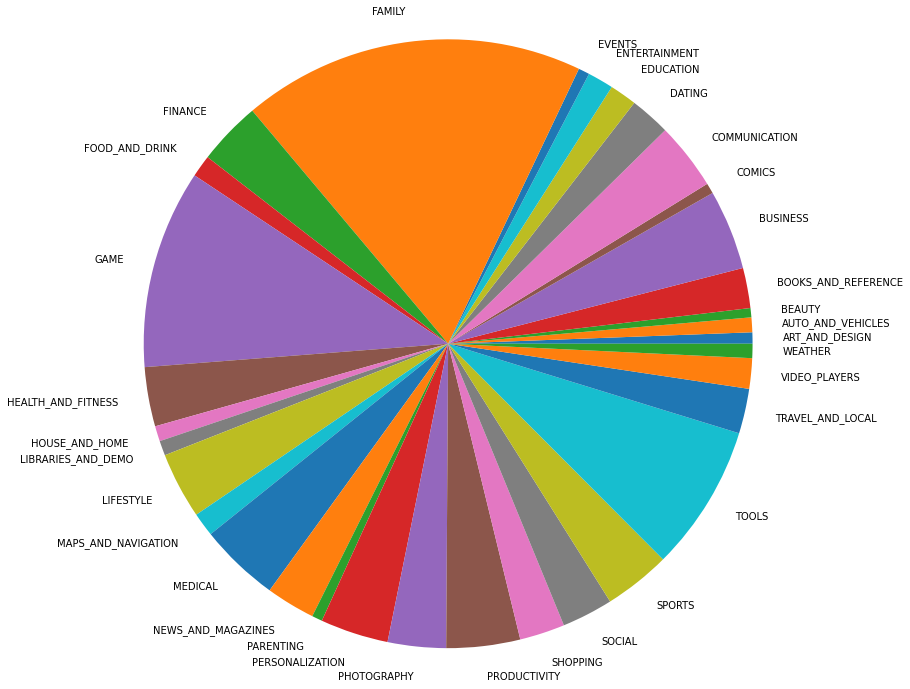

In [ ]:
categorydf= modifieddf.groupby(['Category'])['Category'].count()
categorydf
labels=categorydf.index[1:]
print(labels)
values=categorydf.tolist()[1:]
print(values)
plt.pie(values, labels =labels, radius=3.5)
plt.show

#Paid and Free Application percentage distribution:
Applications on the playstore are of two types:
* Paid
* Unpaid

Plotting a piechart showing the percentage distribution of both paid and unpaid applications:
* Again used groupby function to count the type of applications and take out the sum of the same.
* Plotted a pie chart of radius 2.2 with percentage specification.



Index(['Free', 'Paid'], dtype='object', name='Type')


<function matplotlib.pyplot.show(*args, **kw)>

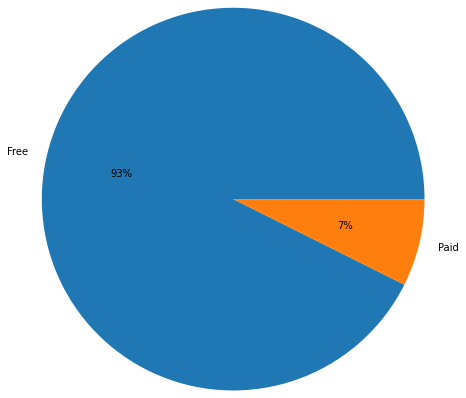

In [ ]:
categorydf= modifieddf.groupby(['Type'])['Type'].count()
categorydf
labels=categorydf.index[1:]
print(labels)
values=categorydf.tolist()[1:]
plt.pie(values, labels =labels, radius=2.2,autopct='%1.0f%%')
plt.show